In [2]:
import numpy as np
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 📦 Step 1: Extract ZIP file
# Assuming the zip file is in the root of your Google Drive
# zip_file_path = '/content/drive/MyDrive/archive.zip' # Original path
zip_file_path = 'archive.zip' # Corrected path based on available files
extract_dir = 'salary_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 📥 Step 2: Load CSV
# Assuming the CSV file is named 'Salary Data.csv' inside the zip
csv_file_path = os.path.join(extract_dir, 'Salary Data.csv')
df = pd.read_csv(csv_file_path)

# 🧹 Step 3: Preprocessing
# Fill missing values
# ✅ Safe way to fill missing values (no FutureWarning)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# 🎯 Step 4: Features and Target
X = df.drop('Salary', axis=1)
y = df['Salary']

# 🔄 Step 5: Encoding + Imputation Pipeline
categorical_features = ['Gender', 'Education Level', 'Job Title']
numerical_features = ['Age', 'Years of Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 🧪 Step 6: Train-Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# 🧑‍💻 Step 7: User Input
# 🧑‍💻 User input with guided options
# 👇 Step-by-step input with numbered options from dataset

print("\n🔍 Please select the following details by entering the number:")

# Gender options
gender_list = sorted(df['Gender'].dropna().unique())
print("\n1️⃣ Gender:")
for i, g in enumerate(gender_list, 1):
    print(f"  {i}. {g}")
gender_choice = int(input("Enter number for Gender: "))
gender = gender_list[gender_choice - 1]

# Education Level options
edu_list = sorted(df['Education Level'].dropna().unique())
print("\n2️⃣ Education Level:")
for i, e in enumerate(edu_list, 1):
    print(f"  {i}. {e}")
edu_choice = int(input("Enter number for Education Level: "))
education = edu_list[edu_choice - 1]

# Job Title options
# Get top 6 most frequent jobs
top_jobs = df['Job Title'].value_counts().head(6).index.tolist()

# Display job options
print("\n3️⃣ Job Title:")
for i, j in enumerate(top_jobs, 1):
    print(f"  {i}. {j}")

# Take validated input from user
while True:
    try:
        job_choice = int(input("Enter number for Job Title (1-6): "))
        if 1 <= job_choice <= len(top_jobs):
            job = top_jobs[job_choice - 1]
            break
        else:
            print(f"Please enter a number between 1 and {len(top_jobs)}")
    except ValueError:
        print("Invalid input. Please enter a number.")


# Age and Experience: direct numeric input
age = float(input("\n4️⃣ Enter Age (e.g., 30): "))
experience = float(input("5️⃣ Enter Years of Experience (e.g., 5): "))

# 🔍 Step 8: Predict Salary
user_df = pd.DataFrame([{
    'Age': age,
    'Years of Experience': experience,
    'Gender': gender,
    'Education Level': education,
    'Job Title': job
}])

predicted_salary = model.predict(user_df)[0]
print(f"\n💰 Predicted Salary (annual): ${predicted_salary:,.2f}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/archive.zip'

In [ ]:

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("----- Accuracy Metrics -----")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

print("----- Interpretation -----")
print(f"R² of {r2:.2f} means the model explains {r2*100:.1f}% of salary variance.")
print(f"RMSE of {rmse:.0f} means predictions deviate by ~{rmse:.0f} units on average.")
print("MAE shows typical error size without being skewed by outliers.")

----- Accuracy Metrics -----
R²: 0.862
MSE: 333738668.27
RMSE: 18268.52
MAE: 11792.38
----- Interpretation -----
R² of 0.86 means the model explains 86.2% of salary variance.
RMSE of 18269 means predictions deviate by ~18269 units on average.
MAE shows typical error size without being skewed by outliers.


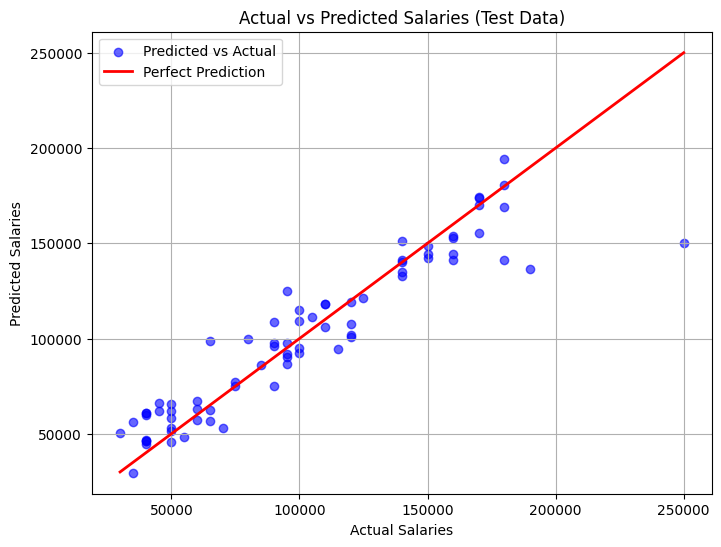

In [ ]:

# --- Data split ---
X = df[['Age','Years of Experience','Gender','Education Level','Job Title']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Preprocessing + Model pipeline ---
categorical = ['Gender','Education Level','Job Title']
numerical = ['Age','Years of Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numerical)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- Train + Predict ---
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# --- Graph: Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Predict salaries on test set
y_pred = pipeline.predict(X_test)

# Create comparison DataFrame
comparison = X_test.copy()
comparison['Actual Salary'] = y_test.values
comparison['Predicted Salary'] = y_pred

# Show first 10 rows
print(comparison.head(10))

      Age  Years of Experience  Gender Education Level  \
167  46.0                 18.0    Male             PhD   
33   39.0                 10.0  Female      Bachelor's   
15   44.0                 16.0    Male      Bachelor's   
316  34.0                  6.0  Female        Master's   
57   43.0                 17.0    Male             PhD   
291  49.0                 21.0    Male             PhD   
76   50.0                 22.0  Female      Bachelor's   
119  35.0                 10.0    Male        Master's   
280  31.0                  3.0    Male      Bachelor's   
126  37.0                  9.0  Female        Master's   

                     Job Title  Actual Salary  Predicted Salary  
167          Senior Researcher       150000.0     142182.454246  
33        Marketing Specialist        65000.0      98827.334139  
15          Operations Manager       125000.0     121308.163219  
316   Senior Financial Advisor        80000.0     100001.097791  
57             Senior Engineer 

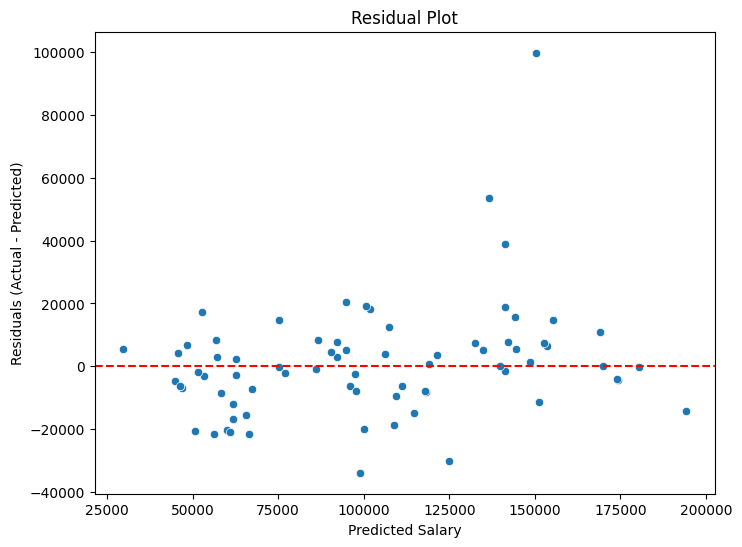

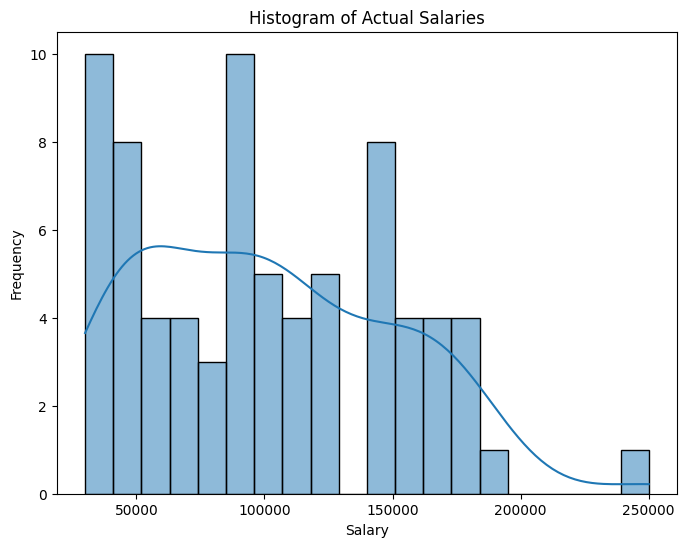

----- Residual Plot Interpretation -----
Residuals have a mean of 545.79, suggesting slight bias in predictions.
The spread of residuals (std) is 18260.36, indicating typical error size.
If residuals look randomly scattered around the red line, the model fit is good.
Patterns (curves or funnels) would suggest missing relationships or unequal error variance.
----- Histogram Interpretation -----
The histogram shows how salaries are distributed in the dataset.
Bars = frequency counts, Curve = smoothed trend (KDE).
Check if the distribution is skewed: right-skew is common in salary data (few very high earners).


In [ ]:

# 1. Predictions and residuals
y_pred = pipeline.predict(X_test)
residuals = y_test - y_pred

# 2. Residual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# 3. Histogram of Salaries
plt.figure(figsize=(8,6))
sns.histplot(y_test, bins=20, kde=True)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Actual Salaries")
plt.show()

# 4. Automatic Explanation
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print("----- Residual Plot Interpretation -----")
if abs(mean_residual) < 1e-6:
    print("Residuals are centered around zero, showing no systematic bias.")
else:
    print(f"Residuals have a mean of {mean_residual:.2f}, suggesting slight bias in predictions.")

print(f"The spread of residuals (std) is {std_residual:.2f}, indicating typical error size.")

print("If residuals look randomly scattered around the red line, the model fit is good.")
print("Patterns (curves or funnels) would suggest missing relationships or unequal error variance.")

print("----- Histogram Interpretation -----")
print("The histogram shows how salaries are distributed in the dataset.")
print("Bars = frequency counts, Curve = smoothed trend (KDE).")
print("Check if the distribution is skewed: right-skew is common in salary data (few very high earners).")

In [3]:

# 1. Generate predictions on the 20% test set
y_pred = pipeline.predict(X_test)

# 2. Create a comparison table
comparison = pd.DataFrame({
    "Actual Salary": y_test.values,
    "Predicted Salary": y_pred,
    "Difference (Actual - Predicted)": y_test.values - y_pred
})

# 3. Show first 20 rows for clarity
print(comparison.head(20))

# 4. Optional: Summary statistics of errors
mean_error = np.mean(comparison["Difference (Actual - Predicted)"])
std_error = np.std(comparison["Difference (Actual - Predicted)"])

print("\n----- Error Summary -----")
print(f"Average error: {mean_error:.2f}")
print(f"Standard deviation of error: {std_error:.2f}")

NameError: name 'pipeline' is not defined

In [ ]:
df = pd.read_csv('salary_data/Salary Data.csv')
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 375
Columns: 6
